Forbes dataset: https://www.kaggle.com/parulpandey/forbes-highest-paid-athletes-19902019

**Realizar el análisis exploratorio con Pandas a esta Base de Datos.**

In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

In [2]:
forbes = pandas.read_csv('Materiales Cap 3/forbes.csv')

forbes.head(2)

,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,Earnings
0,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,Buster Douglas,USA,2,NaN,boxing,1990,26.0


**Solución:**

In [3]:
#verificamos cómo están los datos
forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                301 non-null    object 
 1   Nationality         301 non-null    object 
 2   Current_Rank        301 non-null    int64  
 3   Previous_Year_Rank  277 non-null    object 
 4   Sport               301 non-null    object 
 5   Year                301 non-null    int64  
 6   Earnings            301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [6]:
#analizamos las medidas descriptivas
forbes.describe()

,Current_Rank,Year,Earnings
count,301.000000,301.000000,301.000000
mean,5.448505,2005.122924,45.516279
std,2.850995,9.063563,33.525337
min,1.000000,1990.000000,8.100000
25%,3.000000,1997.000000,24.000000
50%,5.000000,2005.000000,39.000000
75%,8.000000,2013.000000,59.400000
max,10.000000,2020.000000,300.000000


**Dónde están los valores Nulos**

In [18]:
forbes.isnull().sum()

Name                   0
Nationality            0
Current_Rank           0
Previous_Year_Rank    24
Sport                  0
Year                   0
Earnings               0
dtype: int64

**Mostrando los valores Nulos**

In [29]:
#***
#En el video lo hacen de otra manera:
#    forbes.query('Previous_Year_Rank.isnull()')
#Pero me sale error, no entiendo el porqué.
#***
forbes[forbes.Previous_Year_Rank.isnull()]

,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,Earnings
0,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [30]:
#Ejemplo del uso de Query
forbes.query('Name=="Stephen Curry"')

,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,Earnings
268,Stephen Curry,USA,8,NaN,Basketball,2017,47.3
278,Stephen Curry,USA,8,8,Basketball,2018,76.9
289,Stephen Curry,USA,9,8,Basketball,2019,79.8
296,Stephen Curry,USA,6,9,Basketball,2020,74.4


**Atletas que aparecen más de una vez :**

In [34]:
forbes['Name'].value_counts()

Tiger Woods           19
Michael Jordan        19
Kobe Bryant           14
Michael Schumacher    13
LeBron James          13
                      ..
Monica Seles           1
Aaron Rodgers          1
Cam Newton             1
Muhammad Ali           1
Joe Sakic              1
Name: Name, Length: 82, dtype: int64

**Detalles del 2020:**

In [38]:
forbes.query('Year==2020')

,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,Earnings
291,Roger Federer,Switzerland,1,5,Tennis,2020,106.3
292,Cristiano Ronaldo,Portugal,2,2,Soccer,2020,105.0
293,Lionel Messi,Argentina,3,1,Soccer,2020,104.0
294,Neymar,Brazil,4,3,Soccer,2020,95.5
295,LeBron James,USA,5,8,Basketball,2020,88.2
296,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,Tiger Woods,USA,8,11,Golf,2020,62.3
299,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,Carson Wentz,USA,10,>100,American Football,2020,59.1


**Detalles de 1990:**

In [39]:
forbes.query('Year==1990')

,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,Earnings
0,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


El problema es que en las variables **Sport** han cambiado en mayúscula(2020) y minúscula(1990).

**Analicemos a través de una gráfica:**

<AxesSubplot:xlabel='Sport', ylabel='count'>

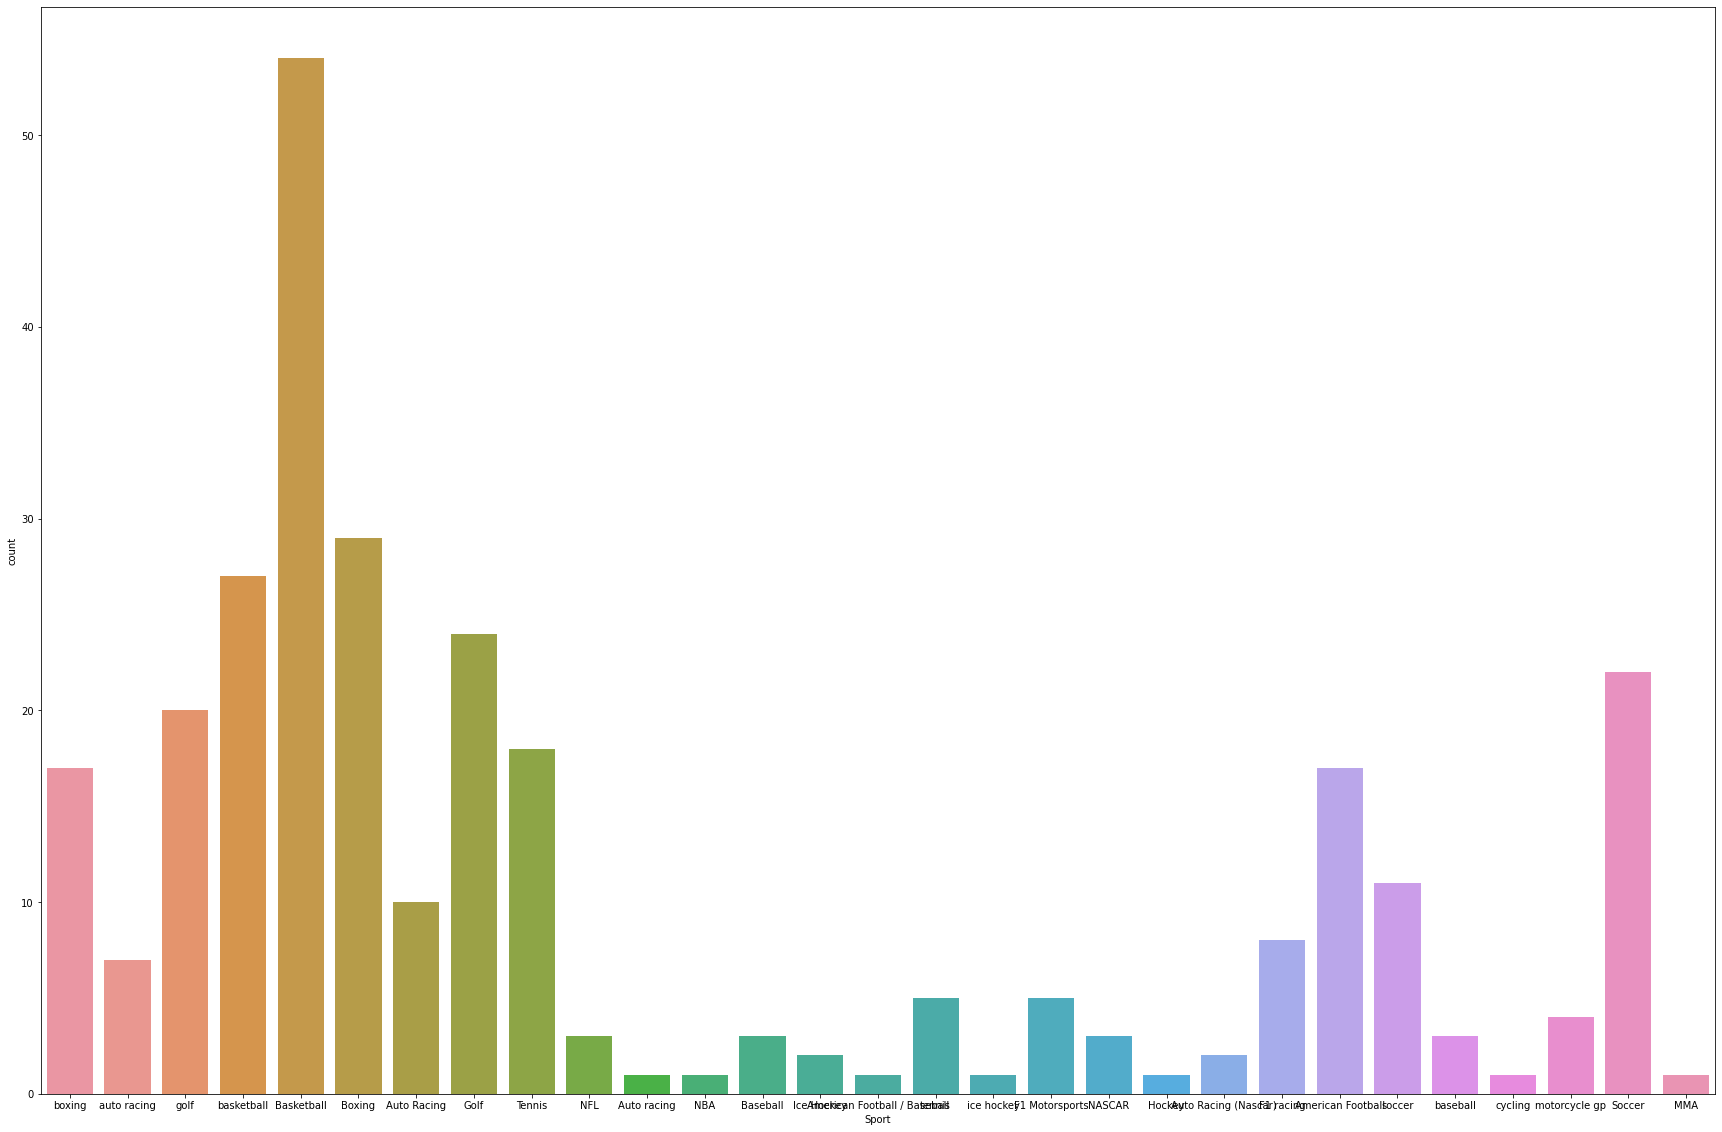

In [41]:
plt.figure(figsize = (30,20))
seaborn.countplot(data = forbes, x = 'Sport')

*Recuerda hacer Zoom a la gráfica, dando doble clic sobre la imagen*

Podemos notar que hay **diferencia** entre `basketball` y `Basketball`, la cual es un error. Además notamos a NBA como si fuera un deporte fuera de Basketball, otro problema. 

**Estos problemas se verán en el capítulo 4**


### Analizamos las ganancias:

<AxesSubplot:xlabel='Earnings', ylabel='Count'>

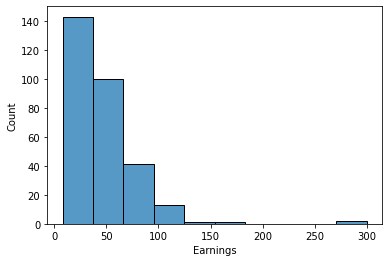

In [42]:
seaborn.histplot(data=forbes, x = 'Earnings', bins = 10)

<AxesSubplot:ylabel='Earnings'>

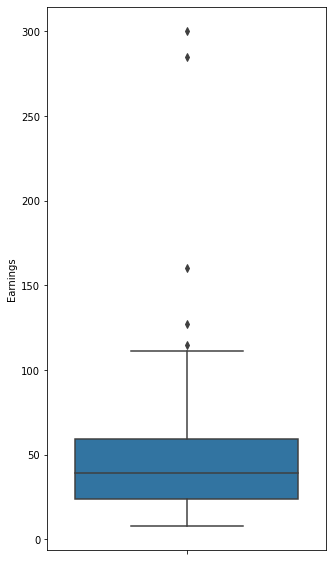

In [43]:
plt.figure(figsize = (5,10))
seaborn.boxplot(data=forbes, y = 'Earnings')

Notamos que muy pocos atletas ganan más de 100 millones

In [45]:
forbes.query('Earnings>112')

,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,Earnings
171,Tiger Woods,USA,1,1,golf,2008,115.0
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
242,Manny Pacquiao,Philippines,2,11,Boxing,2015,160.0
271,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0
281,Lionel Messi,Argentina,1,2,Soccer,2019,127.0
